In [365]:
! pip install levenshtein
! pip install jarowinkler
! pip install py_stringmatching
! pip install pyjarowinkler
! pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [366]:
import pandas as pd
from google.colab import drive
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import Levenshtein as Lev
from itertools import product
from py_stringmatching import similarity_measure as sm 
from pyjarowinkler import distance
import utils 
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
import time


drive.mount('/content/gdrive')
# !ls "/content/gdrive/My Drive"
data_path = "/content/gdrive/My Drive/Master ADS/Week 3/data/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Task 1**

*Question 1*. The two tables can be merged using the Accident_Index field. Write Python code to merge the two tables and store the results in a new csv file.


In [367]:
accidents = pd.read_csv(data_path + "Accidents_2015.csv")
casualties = pd.read_csv(data_path + "Casualties_2015.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [368]:
# explore the dataset 
accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140051,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,11/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
140052,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,02/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
140053,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,23/12/2015,...,0,0,6,4,2,0,0,2,1,NaN
140054,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,26/12/2015,...,0,0,1,2,2,0,0,2,1,NaN


In [369]:
casualties

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186184,201597UA71412,2,2,2,2,10,2,3,0,0,2,0,0,9,1,-1
186185,201597UA71412,2,3,1,1,46,8,3,0,0,0,0,0,9,1,-1
186186,201597UA71510,1,1,3,2,52,8,3,6,9,0,0,0,0,1,-1
186187,201597UA71610,2,1,1,2,42,7,3,0,0,0,0,0,9,-1,-1


In [370]:
merged_df = pd.merge(accidents, casualties, on = "Accident_Index")

In [371]:
# save to csv
merged_df.to_csv(data_path + "merged_df.csv")

*Question 2.*
The Accident_Severity variable needs to be recoded. Write Python code to replace
the values in this column as: 1=Minor (1 should be converted to minor), 2=Medium, 3=Severe. 

In [372]:
severity = [1, 2, 3]
string = ["Minor", "Medium", "Severe"]

merged_df["Accident_Severity"] = merged_df["Accident_Severity"].replace(severity, string)
merged_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Severe,1,1,12/01/2015,...,7,3,5,1,0,0,2,0,-1,-1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Severe,1,1,12/01/2015,...,5,3,9,9,0,0,2,0,1,3
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Severe,1,1,12/01/2015,...,6,3,1,3,0,0,2,0,1,6
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Severe,1,1,13/01/2015,...,2,3,5,1,0,0,2,0,1,2
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Medium,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,1,3,0,0,2,0,0,9,1,-1
164516,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
164517,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
164518,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


*Question 3*. Replace missing values in a set of attributes by -1 (this process has been already done for the example datasets). Then, write Python code to detect these values and report the names of the columns in each table that contain such values.


In [373]:
merged_df = merged_df.fillna(-1)
# how many columns have missing values
print(len(merged_df.columns[merged_df.isin([-1]).any()]))
# name of columns that have missing values
print(merged_df.columns[merged_df.isin([-1]).any()])

26
Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Time', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Home_Area_Type',
       'Casualty_IMD_Decile'],
      dtype='object')


*Question 4.*
For all numerical variables, write a Python function to check if there are any clearly
extreme values, or values that do not belong in that column. If you find any, remove
these records from the dataset.

In [374]:
# get only the numerical values
merged_df_numerical = merged_df.select_dtypes(include = np.number)
# get the rows in which there are no outliers 
# for all the columns in the dataset
merged_df_no_outliers = merged_df_numerical[(np.abs(stats.zscore(merged_df_numerical)) < 3).all(axis=1)]
# index the original dataset with the indexes that 
# have no outliers to include the non-numerical columns
merged_df_no_outliers = merged_df.loc[merged_df_no_outliers.index]

*Question 5.*
Write Python code to create a new attribute (column) called is_minor, that checks
whether a casualty was a minor or an adult. Being adult is defined as having an age
of 18 or above. The column should only contain the values ‘Yes’ and ‘No’.

In [375]:
merged_df_no_outliers['is_minor'] = np.where(merged_df_no_outliers['Age_of_Casualty'] < 18, 'Yes', 'No')

In [376]:
merged_df_no_outliers['Age_of_Casualty'].tail(10)

164491    27
164493    72
164494    61
164495    17
164501    62
164502    46
164504    38
164505    24
164506    22
164508    24
Name: Age_of_Casualty, dtype: int64

In [377]:
merged_df_no_outliers['is_minor'].tail(10)

164491     No
164493     No
164494     No
164495    Yes
164501     No
164502     No
164504     No
164505     No
164506     No
164508     No
Name: is_minor, dtype: object

*Question 6.*
Choose an attribute which is numeric and has some missing values. Then, calculate the
average of all the available values in that column and fill the missing cells in the
column with the average value. For example, the Location_Easting_OSGR variable
has about 27 missing values - solve this with imputation of the average of the
'Location_Easting_OSGR' of all records.

In [378]:
merged_df_no_outliers["Location_Easting_OSGR"] = merged_df_no_outliers["Location_Easting_OSGR"].fillna(merged_df_no_outliers ["Location_Easting_OSGR"].mean())

**Task 2**

*Question 1.*
Remove the disguised values from the table. We need to remove the values that equal
to 0 from columns BloodPressure, SkinThickness and BMI as these are missing
values but they have been disguised by the value 0. Remove the value but keep the
record (i.e.) change the value to null.

In [379]:
# loading the diabetes dataset 
diabetes = pd.read_csv(data_path + "diabetes.csv")
y = diabetes["Outcome"]

In [380]:
# creating a copy to do this question
diabetes_null = diabetes.copy()

In [381]:
# checking for null values
diabetes_null.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [382]:
# replacing 0 with NaN values
diabetes_null["BloodPressure"] = diabetes_null["BloodPressure"].replace(0, np.nan)
diabetes_null["SkinThickness"] = diabetes_null["BloodPressure"].replace(0, np.nan)
diabetes_null["BMI"] = diabetes_null["BMI"].replace(0, np.nan)

In [383]:
# checking if the code bellow worked
diabetes_null.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               35
SkinThickness               35
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

*Question 2.*
Remove the Outcome column and remove one of the columns if their correlation is
greater than 0.5. That is, if there are two columns with correlation value > 0.5 then
remove one of them and keep the other. The input for this step is the original
dataframe not the one that has been produced at step 1.

In [384]:
# drop de outcome column
diabetes = diabetes.drop(columns=["Outcome"])

In [385]:
# show correlations between attributes
corrMatrix = diabetes.corr().abs()
corrMatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000


In [386]:
# create the upper triangle of the correlation matrix
# it doesnt matter whether we use the lower or the upper 
# because they are mirrors but it is important that we dont use the diagonal
upper_triangle = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
# filtering by a specific correlation
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]
diabetes.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [387]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


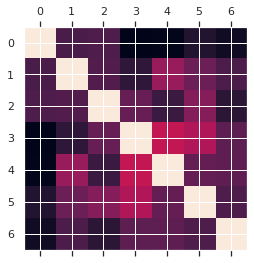

In [388]:
plt.matshow(diabetes.corr())
plt.show()

*Question 3.*
Use a Python library to find the principal components and project the data on those
components. Plot the projected data on the first and the second (principal components)
PCs as a scatter plot. Details about using PCA can be found at:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

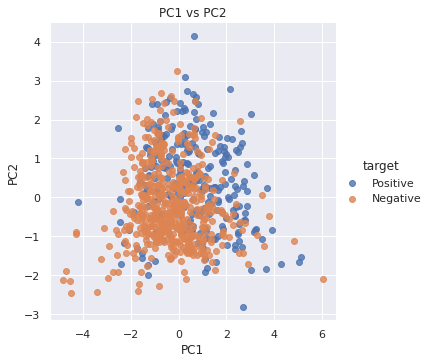

In [389]:
# get only the rows that correspond to the attributes
X = diabetes.values
# data preprocessing
X_scaled = StandardScaler().fit_transform(X)
# create PCA model
pca = PCA(n_components = 2)
# fit the model
features = pca.fit_transform(X_scaled)
# create dataframe with the new components
pca_df = pd.DataFrame(data = features, columns=['PC1', 'PC2'])

target_names = {0:'Negative', 1:'Positive'}
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

# plotting the data on the first and second components
sns.set()
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True)
plt.title('PC1 vs PC2')
plt.show()

**Task 3**


*Question 1.* Perform pairwise comparison between the records in the dataset (publications.csv) to detect the duplicate records. To compare two records, follow the steps:

In [390]:
# loading the datasets
mapping = pd.read_csv(data_path + "pub_mappings.csv") 
publications = pd.read_csv(data_path + "publications.csv") 
pub_B1 = pd.read_csv(data_path + "publications_B1.csv") 
pub_B2 = pd.read_csv(data_path + "publications_B2.csv") 

In [391]:
publications

,id,title,authors,venue,year
0,304586,The WASA2 object-oriented workflow management ...,"Gottfried Vossen, Mathias Weske",International Conference on Management of Data,1999
1,304587,A user-centered interface for querying distrib...,"Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,1999
2,304589,"World Wide Database-integrating the Web, CORBA...","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,1999
3,304590,XML-based information mediation with MIX,"Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,1999
4,304582,The CCUBE constraint object-oriented database ...,"Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,1999
...,...,...,...,...,...
995,conf/vldb/RamakrishnanR96,Modeling Design Versions,"D. Janaki Ram, R. Ramakrishnan",VLDB,1996
996,conf/sigmod/BerchtoldK98,"High-Dimensional Index Structures, Database Su...","Daniel A. Keim, Stefan Berchtold",SIGMOD Conference,1998
997,conf/sigmod/ChoALS03,LockX: A System for Efficiently Querying Secur...,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",SIGMOD Conference,2003
998,journals/sigmod/Winslett02a,David DeWitt Speaks Out,Marianne Winslett,SIGMOD Record,2002


In [392]:
# exploring the dataset 
all_combinations_df = pd.DataFrame()
# for every column
for col in publications.columns:
  list_left = []
  list_right = []
  # we make tuples with every combination
  for subset in itertools.combinations(publications[col], 2):
    list_left.append(subset[0])
    list_right.append(subset[1])
  all_combinations_df[col+"_1"] = list_left
  all_combinations_df[col+"_2"] = list_right
  
all_combinations_df.head()

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999


a. Ignore the pub_id.

b. Use Levenshtein similarity for comparing the titles and computing the score (s_t)


In [393]:
# start time for the whole similarity
start = time.time()

lev = sm.levenshtein.Levenshtein()
# compute levenshtein similarity for the title columns
list_distances = []
for index, row in all_combinations_df.iterrows():
  list_distances.append(lev.get_sim_score(string1=row["title_1"], string2=row["title_2"]))

In [394]:
all_combinations_df["s_t"] = list_distances
all_combinations_df

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818
...,...,...,...,...,...,...,...,...,...,...,...
499495,conf/sigmod/BerchtoldK98,journals/sigmod/Winslett02a,"High-Dimensional Index Structures, Database Su...",David DeWitt Speaks Out,"Daniel A. Keim, Stefan Berchtold",Marianne Winslett,SIGMOD Conference,SIGMOD Record,1998,2002,0.161290
499496,conf/sigmod/BerchtoldK98,conf/sigmod/AndersonAF98,"High-Dimensional Index Structures, Database Su...",Oracle Rdb's Record Caching Model,"Daniel A. Keim, Stefan Berchtold","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,1998,1998,0.182796
499497,conf/sigmod/ChoALS03,journals/sigmod/Winslett02a,LockX: A System for Efficiently Querying Secur...,David DeWitt Speaks Out,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",Marianne Winslett,SIGMOD Conference,SIGMOD Record,2003,2002,0.156863
499498,conf/sigmod/ChoALS03,conf/sigmod/AndersonAF98,LockX: A System for Efficiently Querying Secur...,Oracle Rdb's Record Caching Model,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,2003,1998,0.196078


c. Use Jaro similarity to compare the values in the authors field and compute (s_a) 

In [395]:
jaro = sm.jaro.Jaro()

list_distances_authors = []
# compute jaro similarity for the author columns
for index, row in all_combinations_df.iterrows():
  list_distances_authors.append(jaro.get_sim_score(string1=row["authors_1"], string2=row["authors_2"]))

In [396]:
all_combinations_df["s_a"] = list_distances_authors
all_combinations_df

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268,0.450585
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333,0.475678
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615,0.503136
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615,0.542982
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818,0.479527
...,...,...,...,...,...,...,...,...,...,...,...,...
499495,conf/sigmod/BerchtoldK98,journals/sigmod/Winslett02a,"High-Dimensional Index Structures, Database Su...",David DeWitt Speaks Out,"Daniel A. Keim, Stefan Berchtold",Marianne Winslett,SIGMOD Conference,SIGMOD Record,1998,2002,0.161290,0.542391
499496,conf/sigmod/BerchtoldK98,conf/sigmod/AndersonAF98,"High-Dimensional Index Structures, Database Su...",Oracle Rdb's Record Caching Model,"Daniel A. Keim, Stefan Berchtold","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,1998,1998,0.182796,0.531640
499497,conf/sigmod/ChoALS03,journals/sigmod/Winslett02a,LockX: A System for Efficiently Querying Secur...,David DeWitt Speaks Out,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",Marianne Winslett,SIGMOD Conference,SIGMOD Record,2003,2002,0.156863,0.443027
499498,conf/sigmod/ChoALS03,conf/sigmod/AndersonAF98,LockX: A System for Efficiently Querying Secur...,Oracle Rdb's Record Caching Model,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,2003,1998,0.196078,0.517434


d. Use the modified affine similarity for the conference (conf) attribute (s_c)

In [397]:
def aff_sim (s1, s2, open_gap = 1, gap_ext = 0.1):
    aff_sim = sm.affine.Affine(gap_start = 1, gap_continuation = 0.1, \
                       sim_func = lambda s1, s2: (int(1 if s1 == s2 else 0)))
    return aff_sim.get_raw_score(s1, s2) / min(len(s1), len(s2))

list_distances_venues = []
# compute affine similarity for each row (venue columns)
for index, row in all_combinations_df.iterrows():
  list_distances_venues.append(aff_sim(s1=row["venue_1"], s2=row["venue_2"]))

In [398]:
all_combinations_df["s_c"] = list_distances_venues
all_combinations_df

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a,s_c
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268,0.450585,1.000000
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333,0.475678,1.000000
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615,0.503136,1.000000
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615,0.542982,1.000000
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818,0.479527,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499495,conf/sigmod/BerchtoldK98,journals/sigmod/Winslett02a,"High-Dimensional Index Structures, Database Su...",David DeWitt Speaks Out,"Daniel A. Keim, Stefan Berchtold",Marianne Winslett,SIGMOD Conference,SIGMOD Record,1998,2002,0.161290,0.542391,0.446154
499496,conf/sigmod/BerchtoldK98,conf/sigmod/AndersonAF98,"High-Dimensional Index Structures, Database Su...",Oracle Rdb's Record Caching Model,"Daniel A. Keim, Stefan Berchtold","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,1998,1998,0.182796,0.531640,1.000000
499497,conf/sigmod/ChoALS03,journals/sigmod/Winslett02a,LockX: A System for Efficiently Querying Secur...,David DeWitt Speaks Out,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",Marianne Winslett,SIGMOD Conference,SIGMOD Record,2003,2002,0.156863,0.443027,0.446154
499498,conf/sigmod/ChoALS03,conf/sigmod/AndersonAF98,LockX: A System for Efficiently Querying Secur...,Oracle Rdb's Record Caching Model,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,2003,1998,0.196078,0.517434,1.000000


e. Use Match (1) / Mismatch (0) for the year (s_y)

In [399]:
all_combinations_df["s_y"] = np.where(all_combinations_df["year_1"] == all_combinations_df["year_1"], 1, 0)
all_combinations_df.head()

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a,s_c,s_y
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268,0.450585,1.0,1
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333,0.475678,1.0,1
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615,0.503136,1.0,1
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615,0.542982,1.0,1
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818,0.479527,1.0,1


f. Use the formula rec_sim = 0.5 * s_t + 0.2 * s_a + 0.2 * s_c + 0.1 * s_y to combine the scores and compute the final score. 

In [400]:
all_combinations_df["rec_sim"] = 0.5 * all_combinations_df["s_t"] + 0.2 * all_combinations_df["s_a"] + 0.2 * all_combinations_df["s_c"] + 0.1 * all_combinations_df["s_y"]
all_combinations_df

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a,s_c,s_y,rec_sim
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268,0.450585,1.000000,1,0.495751
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333,0.475678,1.000000,1,0.486802
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615,0.503136,1.000000,1,0.467935
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615,0.542982,1.000000,1,0.600904
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818,0.479527,1.000000,1,0.486815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499495,conf/sigmod/BerchtoldK98,journals/sigmod/Winslett02a,"High-Dimensional Index Structures, Database Su...",David DeWitt Speaks Out,"Daniel A. Keim, Stefan Berchtold",Marianne Winslett,SIGMOD Conference,SIGMOD Record,1998,2002,0.161290,0.542391,0.446154,1,0.378354
499496,conf/sigmod/BerchtoldK98,conf/sigmod/AndersonAF98,"High-Dimensional Index Structures, Database Su...",Oracle Rdb's Record Caching Model,"Daniel A. Keim, Stefan Berchtold","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,1998,1998,0.182796,0.531640,1.000000,1,0.497726
499497,conf/sigmod/ChoALS03,journals/sigmod/Winslett02a,LockX: A System for Efficiently Querying Secur...,David DeWitt Speaks Out,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",Marianne Winslett,SIGMOD Conference,SIGMOD Record,2003,2002,0.156863,0.443027,0.446154,1,0.356268
499498,conf/sigmod/ChoALS03,conf/sigmod/AndersonAF98,LockX: A System for Efficiently Querying Secur...,Oracle Rdb's Record Caching Model,"SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...","Richard Frank, Gopalan Arun, Richard Anderson",SIGMOD Conference,SIGMOD Conference,2003,1998,0.196078,0.517434,1.000000,1,0.501526


g. Report the records with rec_sim > 0.7 as duplicate records by storing the ids of both records in a list.

In [401]:
# records that have a rec_sim greater than 0.7
records_df = all_combinations_df[all_combinations_df['rec_sim'] > 0.7]
# get only the ids
ids_1 = records_df['id_1']
ids_2 = records_df['id_2']
# create a list of tuples containing both ids (records)
records = list(zip(ids_2, ids_1))
for record in records:
  print(record)
print(len(records))

('conf/sigmod/BouguettayaBH99', '304589')
('conf/sigmod/BaruGLMPVC99', '304590')
('journals/sigmod/JenningsNF98', '306112')
('conf/sigmod/BraumandlKK99', '304573')
('conf/sigmod/JarkeQBLMS99', '304568')
('conf/sigmod/RundensteinerCLCZNJLW99', '304579')
('304207', '304581')
('conf/sigmod/Suciu99', '304233')
('conf/sigmod/Mohan99', '304230')
('conf/sigmod/Keim99', '304219')
('375761', '304222')
('375668', '335383')
('journals/sigmod/PapianiWDN99', '333614')
('290607', '333616')
('381897', '333616')
('journals/sigmod/GruenwaldBDGSSV99', '333616')
('journals/sigmod/SouzaS99', '310063')
('journals/sigmod/ShethBS99', '310067')
('journals/tods/CasatiCPP99', '328996')
('journals/tods/Alagic99', '328943')
('journals/sigmod/Mackay99', '309852')
('journals/sigmod/SalgadoE03', '310062')
('277954', '277955')
('journals/tods/LiuHD98', '277628')
('conf/sigmod/ZaianeHLCC98', '276388')
('conf/sigmod/Toyama98', '276389')
('conf/sigmod/BaumannDFRW98', '276386')
('conf/sigmod/AmbiteABKMMMPT98', '276381')


h. In the table pub_mappings.csv, you can find the actual mappings (the ids of the correct duplicate records). Compare the accuracy of this method by counting the number of duplicate records that you discovered correctly. 

In [402]:
mapping

,idDBLP,idACM
0,conf/sigmod/SlivinskasJS01,375678
1,conf/sigmod/RinfretOO01,375669
2,conf/sigmod/DattaDRTV01,375780
3,conf/sigmod/BorkarDS01,375682
4,conf/sigmod/HanPDW01,375664
...,...,...
88,journals/tods/DyresonS98,288087
89,journals/tods/StolboushkinT98,288089
90,journals/tods/MamoulisP01,503101
91,journals/sigmod/KantM00,362091


In [403]:
# transforming mappings to lists and creating
# a list of tuples too to compare with the records
mappings_1 = mapping["idDBLP"].tolist() 
mappings_2 = mapping["idACM"].tolist() 
mappings_tuples = list(zip(mappings_1, mappings_2))

# cast second column to string in order to compare both lists
mappings_transformed = []
for tupla in mappings_tuples:
  mappings_transformed.append((tupla[0], str(tupla[1])))

# computing the accuracy
accuracy = 0
for record in records:
  for map in mappings_transformed:
    if record[0] == map[0] and record[1] == map[1]:
      accuracy += 1

print("Accuracy: {}".format(accuracy/len(mapping)))
end = time.time()

Accuracy: 0.967741935483871


i. Record the running time of the method when processing the pairwise similarity between the 1000 records. 


In [404]:
print("The running time is {} minutes".format((end-start)/60))

The running time is 7.309100862344106 minutes


*Question 2.* Repeat question1 but compare only the records from table publications_B1.csv with those in publications_B2.csv (do not compare the records that exist in the same file). That is, you will compare each record from the 500 records in the first table with all records in the second table. Compute the accuracy and the running time and compare the running time with the running time that was obtained in question 1. 

In [405]:
# exploring the dataset 
pub_B1_B2 = pd.DataFrame()
for col1 in pub_B1:
  for col2 in pub_B2:
    if col1 == col2:
      list_products = list(product(pub_B1[col1], pub_B2[col2]))
      list_products_0 = [tupla[0] for tupla in list_products]
      list_products_1 = [tupla[1] for tupla in list_products]
      pub_B1_B2[col1+"_1"] = list_products_0
      pub_B1_B2[col2+"_2"] = list_products_1
pub_B1_B2

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2
0,304586,journals/sigmod/Mackay99,The WASA2 object-oriented workflow management ...,Semantic Integration of Environmental Models f...,"Gottfried Vossen, Mathias Weske",D. Scott Mackay,International Conference on Management of Data,SIGMOD Record,1999,1999
1,304586,conf/vldb/PoosalaI96,The WASA2 object-oriented workflow management ...,Estimation of Query-Result Distribution and it...,"Gottfried Vossen, Mathias Weske","Viswanath Poosala, Yannis E. Ioannidis",International Conference on Management of Data,VLDB,1999,1996
2,304586,conf/vldb/PalpanasSCP02,The WASA2 object-oriented workflow management ...,Incremental Maintenance for Non-Distributive A...,"Gottfried Vossen, Mathias Weske","Themistoklis Palpanas, Richard Sidle, Hamid Pi...",International Conference on Management of Data,VLDB,1999,2002
3,304586,conf/vldb/GardarinGT96,The WASA2 object-oriented workflow management ...,Cost-based Selection of Path Expression Proces...,"Gottfried Vossen, Mathias Weske","Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",International Conference on Management of Data,VLDB,1999,1996
4,304586,conf/vldb/HoelS95,The WASA2 object-oriented workflow management ...,Benchmarking Spatial Join Operations with Spat...,"Gottfried Vossen, Mathias Weske","Erik G. Hoel, Hanan Samet",International Conference on Management of Data,VLDB,1999,1995
...,...,...,...,...,...,...,...,...,...,...
249995,362091,conf/vldb/RamakrishnanR96,Workshop on performance and architecture of we...,Modeling Design Versions,"Krishna Kant, Prasant Mohapatra","D. Janaki Ram, R. Ramakrishnan",ACM SIGMOD Record,VLDB,2000,1996
249996,362091,conf/sigmod/BerchtoldK98,Workshop on performance and architecture of we...,"High-Dimensional Index Structures, Database Su...","Krishna Kant, Prasant Mohapatra","Daniel A. Keim, Stefan Berchtold",ACM SIGMOD Record,SIGMOD Conference,2000,1998
249997,362091,conf/sigmod/ChoALS03,Workshop on performance and architecture of we...,LockX: A System for Efficiently Querying Secur...,"Krishna Kant, Prasant Mohapatra","SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",ACM SIGMOD Record,SIGMOD Conference,2000,2003
249998,362091,journals/sigmod/Winslett02a,Workshop on performance and architecture of we...,David DeWitt Speaks Out,"Krishna Kant, Prasant Mohapatra",Marianne Winslett,ACM SIGMOD Record,SIGMOD Record,2000,2002


In [406]:
# start time for the whole similarity
start_2 = time.time()

lev_2 = sm.levenshtein.Levenshtein()

list_distances_2 = []
for index, row in pub_B1_B2.iterrows():
  list_distances_2.append(lev_2.get_sim_score(string1=row["title_1"], string2=row["title_2"]))

pub_B1_B2["s_t"] = list_distances_2

In [407]:
jaro_2 = sm.jaro.Jaro()

list_distances_authors_2 = []
for index, row in pub_B1_B2.iterrows():
  list_distances_authors_2.append(jaro_2.get_sim_score(string1=row["authors_1"], string2=row["authors_2"]))

pub_B1_B2["s_a"] = list_distances_authors_2

In [408]:
list_distances_venues_2 = []
# compute affine similarity for each row (venue columns)
for index, row in pub_B1_B2.iterrows():
  list_distances_venues_2.append(aff_sim(s1=row["venue_1"], s2=row["venue_2"]))

pub_B1_B2["s_c"] = list_distances_venues_2

In [409]:
pub_B1_B2["s_y"] = np.where(pub_B1_B2["year_1"] == pub_B1_B2["year_1"], 1, 0)
all_combinations_df.head()

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a,s_c,s_y,rec_sim
0,304586,304587,The WASA2 object-oriented workflow management ...,A user-centered interface for querying distrib...,"Gottfried Vossen, Mathias Weske","Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.211268,0.450585,1.0,1,0.495751
1,304586,304589,The WASA2 object-oriented workflow management ...,"World Wide Database-integrating the Web, CORBA...","Gottfried Vossen, Mathias Weske","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.183333,0.475678,1.0,1,0.486802
2,304586,304590,The WASA2 object-oriented workflow management ...,XML-based information mediation with MIX,"Gottfried Vossen, Mathias Weske","Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.134615,0.503136,1.0,1,0.467935
3,304586,304582,The WASA2 object-oriented workflow management ...,The CCUBE constraint object-oriented database ...,"Gottfried Vossen, Mathias Weske","Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.384615,0.542982,1.0,1,0.600904
4,304586,304583,The WASA2 object-oriented workflow management ...,The Cornell Jaguar project: adding mobility to...,"Gottfried Vossen, Mathias Weske","Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,International Conference on Management of Data,1999,1999,0.181818,0.479527,1.0,1,0.486815


In [410]:
pub_B1_B2["rec_sim"] = 0.5 * pub_B1_B2["s_t"] + 0.2 * pub_B1_B2["s_a"] + 0.2 * pub_B1_B2["s_c"] + 0.1 * pub_B1_B2["s_y"]
pub_B1_B2

,id_1,id_2,title_1,title_2,authors_1,authors_2,venue_1,venue_2,year_1,year_2,s_t,s_a,s_c,s_y,rec_sim
0,304586,journals/sigmod/Mackay99,The WASA2 object-oriented workflow management ...,Semantic Integration of Environmental Models f...,"Gottfried Vossen, Mathias Weske",D. Scott Mackay,International Conference on Management of Data,SIGMOD Record,1999,1999,0.218182,0.555466,-0.230769,1,0.274030
1,304586,conf/vldb/PoosalaI96,The WASA2 object-oriented workflow management ...,Estimation of Query-Result Distribution and it...,"Gottfried Vossen, Mathias Weske","Viswanath Poosala, Yannis E. Ioannidis",International Conference on Management of Data,VLDB,1999,1996,0.186813,0.555147,-1.249999,1,0.054436
2,304586,conf/vldb/PalpanasSCP02,The WASA2 object-oriented workflow management ...,Incremental Maintenance for Non-Distributive A...,"Gottfried Vossen, Mathias Weske","Themistoklis Palpanas, Richard Sidle, Hamid Pi...",International Conference on Management of Data,VLDB,1999,2002,0.171875,0.559734,-1.249999,1,0.047884
3,304586,conf/vldb/GardarinGT96,The WASA2 object-oriented workflow management ...,Cost-based Selection of Path Expression Proces...,"Gottfried Vossen, Mathias Weske","Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",International Conference on Management of Data,VLDB,1999,1996,0.211111,0.562168,-1.249999,1,0.067989
4,304586,conf/vldb/HoelS95,The WASA2 object-oriented workflow management ...,Benchmarking Spatial Join Operations with Spat...,"Gottfried Vossen, Mathias Weske","Erik G. Hoel, Hanan Samet",International Conference on Management of Data,VLDB,1999,1995,0.089286,0.527681,-1.249999,1,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,362091,conf/vldb/RamakrishnanR96,Workshop on performance and architecture of we...,Modeling Design Versions,"Krishna Kant, Prasant Mohapatra","D. Janaki Ram, R. Ramakrishnan",ACM SIGMOD Record,VLDB,2000,1996,0.163636,0.558154,-0.550000,1,0.183449
249996,362091,conf/sigmod/BerchtoldK98,Workshop on performance and architecture of we...,"High-Dimensional Index Structures, Database Su...","Krishna Kant, Prasant Mohapatra","Daniel A. Keim, Stefan Berchtold",ACM SIGMOD Record,SIGMOD Conference,2000,1998,0.193548,0.495318,0.323529,1,0.360544
249997,362091,conf/sigmod/ChoALS03,Workshop on performance and architecture of we...,LockX: A System for Efficiently Querying Secur...,"Krishna Kant, Prasant Mohapatra","SungRan Cho, Laks V. S. Lakshmanan, Divesh Sri...",ACM SIGMOD Record,SIGMOD Conference,2000,2003,0.200000,0.514874,0.323529,1,0.367681
249998,362091,journals/sigmod/Winslett02a,Workshop on performance and architecture of we...,David DeWitt Speaks Out,"Krishna Kant, Prasant Mohapatra",Marianne Winslett,ACM SIGMOD Record,SIGMOD Record,2000,2002,0.163636,0.546087,0.823077,1,0.455651


In [411]:
from numpy.core.arrayprint import printoptions
# records that have a rec_sim greater than 0.7
records_df_2 = pub_B1_B2[pub_B1_B2['rec_sim'] > 0.7]
# get only the ids
ids_1_1 = records_df_2['id_1']
ids_2_2 = records_df_2['id_2']
# create a list of tuples containing both ids (records)
records_2 = list(zip(ids_2_2, ids_1_1))

records_2_transformed = []
for tupla in records_2:
  records_2_transformed.append((tupla[0], str(tupla[1])))


# computing the accuracy
accuracy_2 = 0
list_records = []
for record in records_2_transformed:
  for map in mappings_transformed:
    if record[0] == map[0] and record[1] == map[1]:
      list_records.append(record)

print(len(set(list_records)))
print("Accuracy: {}".format(len(set(list_records))/len(mapping)))
end_2 = time.time()

90
Accuracy: 0.967741935483871


In [412]:
print("The running time is {} minutes".format((end_2-start_2)/60))

The running time is 3.1863160451253254 minutes
